In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 

movie_df = pd.read_csv('Data/Complete_CLEAN_IMDB_Data.csv')

In [3]:
#set how floats are displayed
pd.options.display.float_format = '{:.2f}'.format

In [4]:
movie_df.head()

,Unnamed: 0,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,...,Number of Votes,Unnamed: 0_y.1,Movie,Production Budget,Domestic Gross_y,Worldwide Gross,Profit,ROI,Year_y,nameYear
0,0,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama",False,False,...,275300,436,the secret life of walter mitty,91000000,58236838,187861183,96861183,2.06,2013,the secret life of walter mitty2013
1,1,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",True,True,...,105116,2066,a walk among the tombstones,28000000,26017685,62108587,34108587,2.22,2014,a walk among the tombstones2014
2,2,60,tt0369610,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",True,False,...,539338,33,jurassic world,215000000,652270625,1648854864,1433854864,7.67,2015,jurassic world2015
3,3,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.00,"Comedy,Drama",False,False,...,94787,1315,the rum diary,45000000,13109815,21544732,-23455268,0.48,2011,the rum diary2011
4,4,67,tt0383010,The Three Stooges,The Three Stooges,2012,92.00,"Comedy,Family",False,False,...,28570,1903,the three stooges,30000000,44338224,54052249,24052249,1.80,2012,the three stooges2012


In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1163 non-null   int64  
 1   Unnamed: 0_x       1163 non-null   int64  
 2   tconst             1163 non-null   object 
 3   primary_title      1163 non-null   object 
 4   original_title     1163 non-null   object 
 5   start_year         1163 non-null   int64  
 6   runtime_minutes    1163 non-null   float64
 7   genres             1163 non-null   object 
 8   Action             1163 non-null   bool   
 9   Crime              1163 non-null   bool   
 10  Drama              1163 non-null   bool   
 11  Biography          1163 non-null   bool   
 12  Comedy             1163 non-null   bool   
 13  Fantasy            1163 non-null   bool   
 14  Horror             1163 non-null   bool   
 15  Thriller           1163 non-null   bool   
 16  Adventure          1163 

In [6]:
col_drop = ['Unnamed: 0','Unnamed: 0_x','start_year_str','Unnamed: 0_y', 'Clean Title','Unnamed: 0_x.1',
           'Unnamed: 0_y.1','Domestic Gross_x','Year_y','nameYear']

movie_df.drop(col_drop, axis = 1, inplace = True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1163 non-null   object 
 1   primary_title      1163 non-null   object 
 2   original_title     1163 non-null   object 
 3   start_year         1163 non-null   int64  
 4   runtime_minutes    1163 non-null   float64
 5   genres             1163 non-null   object 
 6   Action             1163 non-null   bool   
 7   Crime              1163 non-null   bool   
 8   Drama              1163 non-null   bool   
 9   Biography          1163 non-null   bool   
 10  Comedy             1163 non-null   bool   
 11  Fantasy            1163 non-null   bool   
 12  Horror             1163 non-null   bool   
 13  Thriller           1163 non-null   bool   
 14  Adventure          1163 non-null   bool   
 15  Animation          1163 non-null   bool   
 16  Documentary        1163 

In [7]:
movie_df.describe()

,start_year,runtime_minutes,Year_x,Average Rating,Number of Votes,Production Budget,Domestic Gross_y,Worldwide Gross,Profit,ROI
count,1163.00,1163.00,1163.00,1163.00,1163.00,1163.00,1163.00,1163.00,1163.00,1163.00
mean,2013.71,109.39,2013.71,6.46,139507.42,51024298.93,66113324.41,164538068.97,113513770.04,4.42
std,2.56,18.42,2.56,0.93,171064.90,56861818.42,84945629.07,235839415.55,194985394.88,13.52
min,2010.00,0.00,2010.00,1.60,5.00,27000.00,0.00,3547.00,-110450242.00,0.00
25%,2011.00,97.00,2011.00,5.90,35953.50,13000000.00,14156294.50,25974862.00,5848739.00,1.36
50%,2014.00,107.00,2014.00,6.50,83200.00,30000000.00,38180928.00,76235001.00,42150788.00,2.58
75%,2016.00,119.00,2016.00,7.10,174728.50,65000000.00,82338281.00,195492439.50,129091448.00,4.41
max,2018.00,180.00,2018.00,8.80,1841066.00,410600000.00,700059566.00,2048134200.00,1748134200.00,416.56


## QUESTION: Makes sense to use quantiles to divide  data set? <25 = low, 25-75 = med, >75 = high ##

In [8]:
#confirm correlation btwn engagement and gross

x = movie_df['Average Rating']
y= movie_df['Worldwide Gross']


In [9]:
# x= pd.to_datetime(x)

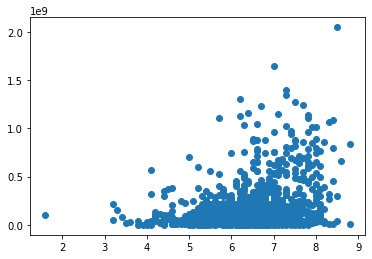

In [10]:
fig, ax = plt.subplots()

ax.scatter(x,y)

In [11]:
#should actually do this by profit or gros....

studio_count = movie_df.groupby(['Studio']).sum().sort_values(by=['Worldwide Gross'], ascending=False)
#studio_count.head(10)

In [12]:
#IF RERUNING THIS CELL NEED TO RERUN ALL ABOVE FIRST
studio_count.reset_index(inplace=True)
top_ten_studios = studio_count['Studio'][:10]

In [13]:
top_ten_studios = top_ten_studios.tolist()
top_ten_studios

['BV', 'Fox', 'Uni.', 'WB', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'P/DW', 'LG/S']

In [14]:
movie_df[movie_df['Studio'] == 'WB ']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,Biography,...,Foreign Gross,Year_x,Average Rating,Number of Votes,Movie,Production Budget,Domestic Gross_y,Worldwide Gross,Profit,ROI


In [15]:
movie_df.head()
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1163 non-null   object 
 1   primary_title      1163 non-null   object 
 2   original_title     1163 non-null   object 
 3   start_year         1163 non-null   int64  
 4   runtime_minutes    1163 non-null   float64
 5   genres             1163 non-null   object 
 6   Action             1163 non-null   bool   
 7   Crime              1163 non-null   bool   
 8   Drama              1163 non-null   bool   
 9   Biography          1163 non-null   bool   
 10  Comedy             1163 non-null   bool   
 11  Fantasy            1163 non-null   bool   
 12  Horror             1163 non-null   bool   
 13  Thriller           1163 non-null   bool   
 14  Adventure          1163 non-null   bool   
 15  Animation          1163 non-null   bool   
 16  Documentary        1163 

In [16]:
# movie_df1 = movie_df[[str(‘genres’), str(‘Movie’), str(‘Profit’), str(‘ROI’), str(‘Year_y’)]].copy()

In [17]:
 movie_df['genres'] = movie_df['genres'].apply(lambda x: x.split(","))

In [18]:
exploded_movie_df = movie_df.explode('genres')

In [19]:
exploded_movie_df.head(15)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,Biography,...,Foreign Gross,Year_x,Average Rating,Number of Votes,Movie,Production Budget,Domestic Gross_y,Worldwide Gross,Profit,ROI
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,Adventure,False,False,True,False,...,129900000,2013,7.30,275300,the secret life of walter mitty,91000000,58236838,187861183,96861183,2.06
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,Comedy,False,False,True,False,...,129900000,2013,7.30,275300,the secret life of walter mitty,91000000,58236838,187861183,96861183,2.06
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,Drama,False,False,True,False,...,129900000,2013,7.30,275300,the secret life of walter mitty,91000000,58236838,187861183,96861183,2.06
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,Action,True,True,True,False,...,26900000,2014,6.50,105116,a walk among the tombstones,28000000,26017685,62108587,34108587,2.22
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,Crime,True,True,True,False,...,26900000,2014,6.50,105116,a walk among the tombstones,28000000,26017685,62108587,34108587,2.22
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,Drama,True,True,True,False,...,26900000,2014,6.50,105116,a walk among the tombstones,28000000,26017685,62108587,34108587,2.22
2,tt0369610,Jurassic World,Jurassic World,2015,124.00,Action,True,False,False,False,...,"1,019.4",2015,7.00,539338,jurassic world,215000000,652270625,1648854864,1433854864,7.67
2,tt0369610,Jurassic World,Jurassic World,2015,124.00,Adventure,True,False,False,False,...,"1,019.4",2015,7.00,539338,jurassic world,215000000,652270625,1648854864,1433854864,7.67
2,tt0369610,Jurassic World,Jurassic World,2015,124.00,Sci-Fi,True,False,False,False,...,"1,019.4",2015,7.00,539338,jurassic world,215000000,652270625,1648854864,1433854864,7.67
3,tt0376136,The Rum Diary,The Rum Diary,2011,119.00,Comedy,False,False,True,False,...,10800000,2011,6.20,94787,the rum diary,45000000,13109815,21544732,-23455268,0.48


In [20]:
exploded_movie_df['Studio']

0        Fox
0        Fox
0        Fox
1       Uni.
1       Uni.
        ... 
1161     A24
1161     A24
1162      WB
1162      WB
1162      WB
Name: Studio, Length: 3041, dtype: object

In [21]:
keep_cols = ['tconst', 'primary_title' ,'original_title' , 'start_year' , 'runtime_minutes', 'genres', 
             'Year_x', 'Average Rating', 'Number of Votes' , 'Movie' ,'Production Budget', 'Domestic Gross_y',
             'Worldwide Gross' ,'Profit', 'ROI','Studio']        

In [22]:
exploded_movie_df = exploded_movie_df[keep_cols]

In [23]:
exploded_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041 entries, 0 to 1162
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             3041 non-null   object 
 1   primary_title      3041 non-null   object 
 2   original_title     3041 non-null   object 
 3   start_year         3041 non-null   int64  
 4   runtime_minutes    3041 non-null   float64
 5   genres             3041 non-null   object 
 6   Year_x             3041 non-null   int64  
 7   Average Rating     3041 non-null   float64
 8   Number of Votes    3041 non-null   int64  
 9   Movie              3041 non-null   object 
 10  Production Budget  3041 non-null   int64  
 11  Domestic Gross_y   3041 non-null   int64  
 12  Worldwide Gross    3041 non-null   int64  
 13  Profit             3041 non-null   int64  
 14  ROI                3041 non-null   float64
 15  Studio             3041 non-null   object 
dtypes: float64(3), int64(7),

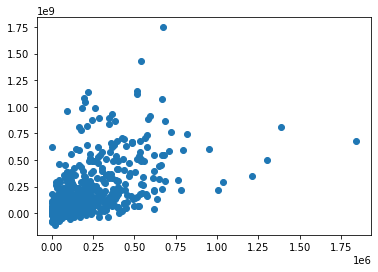

In [24]:
x = movie_df['Number of Votes']
y= movie_df['Profit']

fig, ax = plt.subplots()

ax.scatter(x,y)

In [25]:
def category(x):
    if x < 35953:
        return "Low"
    elif x > 174729:
        return "High"
    else:
        return "Medium"


In [26]:
exploded_movie_df['Engagement Level'] = exploded_movie_df['Number of Votes'].apply(lambda x: category(x))

In [27]:
exploded_movie_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Year_x,Average Rating,Number of Votes,Movie,Production Budget,Domestic Gross_y,Worldwide Gross,Profit,ROI,Studio,Engagement Level
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,Adventure,2013,7.30,275300,the secret life of walter mitty,91000000,58236838,187861183,96861183,2.06,Fox,High
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,Comedy,2013,7.30,275300,the secret life of walter mitty,91000000,58236838,187861183,96861183,2.06,Fox,High
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,Drama,2013,7.30,275300,the secret life of walter mitty,91000000,58236838,187861183,96861183,2.06,Fox,High
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,Action,2014,6.50,105116,a walk among the tombstones,28000000,26017685,62108587,34108587,2.22,Uni.,Medium
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,Crime,2014,6.50,105116,a walk among the tombstones,28000000,26017685,62108587,34108587,2.22,Uni.,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,tt7784604,Hereditary,Hereditary,2018,127.00,Horror,2018,7.30,151571,hereditary,10000000,44069456,70133905,60133905,7.01,A24,Medium
1161,tt7784604,Hereditary,Hereditary,2018,127.00,Mystery,2018,7.30,151571,hereditary,10000000,44069456,70133905,60133905,7.01,A24,Medium
1162,tt7959026,The Mule,The Mule,2018,116.00,Crime,2018,7.10,58955,the mule,50000000,103804407,170857676,120857676,3.42,WB,Medium
1162,tt7959026,The Mule,The Mule,2018,116.00,Drama,2018,7.10,58955,the mule,50000000,103804407,170857676,120857676,3.42,WB,Medium


In [28]:
exploded_movie_df.reset_index(inplace=True, drop=True)

In [29]:
exploded_movie_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Year_x,Average Rating,Number of Votes,Movie,Production Budget,Domestic Gross_y,Worldwide Gross,Profit,ROI,Studio,Engagement Level
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,Adventure,2013,7.30,275300,the secret life of walter mitty,91000000,58236838,187861183,96861183,2.06,Fox,High
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,Comedy,2013,7.30,275300,the secret life of walter mitty,91000000,58236838,187861183,96861183,2.06,Fox,High
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,Drama,2013,7.30,275300,the secret life of walter mitty,91000000,58236838,187861183,96861183,2.06,Fox,High
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,Action,2014,6.50,105116,a walk among the tombstones,28000000,26017685,62108587,34108587,2.22,Uni.,Medium
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00,Crime,2014,6.50,105116,a walk among the tombstones,28000000,26017685,62108587,34108587,2.22,Uni.,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,tt7784604,Hereditary,Hereditary,2018,127.00,Horror,2018,7.30,151571,hereditary,10000000,44069456,70133905,60133905,7.01,A24,Medium
3037,tt7784604,Hereditary,Hereditary,2018,127.00,Mystery,2018,7.30,151571,hereditary,10000000,44069456,70133905,60133905,7.01,A24,Medium
3038,tt7959026,The Mule,The Mule,2018,116.00,Crime,2018,7.10,58955,the mule,50000000,103804407,170857676,120857676,3.42,WB,Medium
3039,tt7959026,The Mule,The Mule,2018,116.00,Drama,2018,7.10,58955,the mule,50000000,103804407,170857676,120857676,3.42,WB,Medium


In [38]:
exploded_movie_df.groupby('genres').mean().sort_values(['ROI'])

,start_year,runtime_minutes,Year_x,Average Rating,Number of Votes,Production Budget,Domestic Gross_y,Worldwide Gross,Profit,ROI
genres,,,,,,,,,,
War,2013.00,118.42,2013.00,6.42,96377.25,35083333.33,32847598.50,79324273.17,44240939.83,1.62
Western,2012.44,120.11,2012.44,6.71,234781.33,67611111.11,63745616.00,137547470.44,69936359.33,2.11
Crime,2013.74,110.72,2013.74,6.49,133091.54,34922925.53,42641321.24,90298138.66,55375213.13,2.58
Sport,2014.00,123.04,2014.00,7.01,97212.61,27695652.17,42817145.39,65228597.83,37532945.65,2.66
Family,2012.97,105.49,2012.97,6.08,83658.97,71702816.90,75986032.62,183591430.90,111888614.00,2.69
Action,2013.92,113.69,2013.92,6.45,198856.75,84547513.66,94588971.05,257745219.99,173197706.33,2.93
History,2015.33,125.90,2015.33,7.06,122648.33,41216666.67,52740229.40,107117985.57,65901318.90,3.04
Adventure,2014.05,111.97,2014.05,6.53,215489.04,110432094.59,131236697.49,371056808.06,260624713.46,3.31
Musical,2013.00,126.75,2013.00,6.75,93641.25,54325000.00,64031727.00,147269405.75,92944405.75,3.31


In [413]:
studio_genre_engagement = pd.pivot_table(exploded_movie_df, values='Worldwide Gross', index=['Studio'],
                    columns=['genres'], aggfunc='count', fill_value=0)
studio_genre_engagement  

genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Studio,,,,,,,,,,,,,,,,,,,,,
3D,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A24,1,2,0,1,6,2,0,14,0,1,...,3,0,0,2,4,0,0,2,0,0
ATO,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Affirm,0,1,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Alc,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W/Dim.,0,0,0,0,1,0,0,0,0,0,...,4,0,0,2,0,2,0,1,0,0
WB,49,37,9,9,39,21,0,55,7,17,...,5,5,0,9,13,13,2,11,1,0
WB (NL),8,10,0,0,22,8,0,12,1,6,...,8,1,1,6,8,1,1,5,0,0


In [32]:
profit_genre_engagement = pd.pivot_table(exploded_movie_df, values='Worldwide Gross', index=['genres'],
                    columns=['Engagement'], aggfunc='sum', fill_value=0)
profit_genre_engagement = profit_genre_engagement[['Low','Medium','High']]


KeyError: 'Engagement'

In [426]:
profit_genre_engagement = pd.pivot_table(exploded_movie_df, values='Profit', index=['genres'],
                    columns=['Engagement Level'], aggfunc='sum', fill_value=0)
profit_genre_engagement = profit_genre_engagement[['Low','Medium','High']]
profit_genre_engagement

Engagement Level,Low,Medium,High
genres,,,
Action,358075319,11342117024,51690168175
Adventure,2127177594,16583742121,58433995470
Animation,1856494238,10531417681,15205094580
Biography,338400497,1786611172,4996358755
Comedy,3736591153,19522702500,23990296899
Crime,329529787,3365102176,6715908105
Documentary,421066428,243519175,0
Drama,1596042816,10315714067,19794426295
Family,659669830,4104221047,3180200717


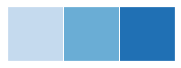

In [417]:
sequential_colors = sns.color_palette("Blues", 3)
sns.palplot(sequential_colors)

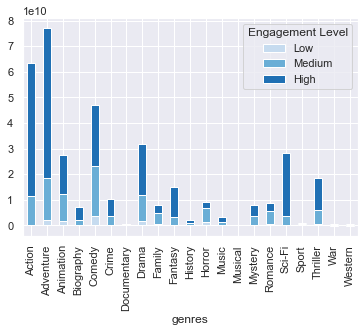

In [427]:
profit_genre_engagement.plot.bar(stacked=True, color=sequential_colors)
sns.set_theme()


In [380]:
profit_genre_engagement

Engagement Level,High,Low,Medium
genres,,,
Action,149,43,174
Adventure,127,43,126
Animation,27,23,40
Biography,24,43,45
Comedy,82,115,236
Crime,46,36,106
Documentary,0,10,3
Drama,115,166,285
Family,8,32,31


In [381]:
total = profit_genre_engagement.sum(axis = 1).reset_index()

total

,genres,0
0,Action,366
1,Adventure,296
2,Animation,90
3,Biography,112
4,Comedy,433
5,Crime,188
6,Documentary,13
7,Drama,566
8,Family,71
9,Fantasy,100


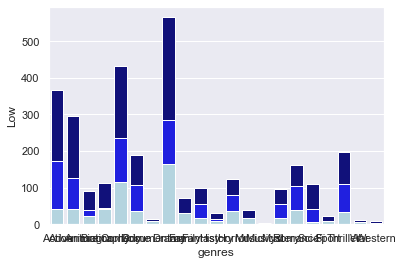

In [382]:
# bar chart 1 -> top bars (group of 'smoker=No')
high_bar = sns.barplot(x="genres",  y=0, data=total, color='darkblue')

profit_genre_engagement.reset_index(inplace=True)


#medium bar
# bottom bar ->  take only smoker=Yes values from the data
medium_b = profit_genre_engagement[['genres','Medium']]

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="genres", y="Medium", data=medium_b, estimator=sum, ci=None,  color='blue')

low_b = profit_genre_engagement[['genres','Low']]
bar3 = sns.barplot(x='genres', y='Low', data=low_b, estimator=sum, ci=None, color='lightblue')

In [338]:
profit_genre_engagement.reset_index(inplace=True)
profit_genre_engagement

Engagement Level,genres,High,Low,Medium
0,Action,149,43,174
1,Adventure,127,43,126
2,Animation,27,23,40
3,Biography,24,43,45
4,Comedy,82,115,236
5,Crime,46,36,106
6,Documentary,0,10,3
7,Drama,115,166,285
8,Family,8,32,31
9,Fantasy,30,16,54


Engagement Level,genres,Medium
0,Action,174
1,Adventure,126
2,Animation,40
3,Biography,45
4,Comedy,236
5,Crime,106
6,Documentary,3
7,Drama,285
8,Family,31
9,Fantasy,54


In [279]:
x_val = profit_genre_engagement.index.to_list()
x_val

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

    day  total_bill
0  Thur     1096.33
1   Fri      325.88
2   Sat     1778.40
3   Sun     1627.16
     total_bill  tip     sex smoker  day    time  size
56        38.01 3.00    Male    Yes  Sat  Dinner     4
58        11.24 1.76    Male    Yes  Sat  Dinner     2
60        20.29 3.21    Male    Yes  Sat  Dinner     2
61        13.81 2.00    Male    Yes  Sat  Dinner     2
62        11.02 1.98    Male    Yes  Sat  Dinner     2
..          ...  ...     ...    ...  ...     ...   ...
234       15.53 3.00    Male    Yes  Sat  Dinner     2
236       12.60 1.00    Male    Yes  Sat  Dinner     2
237       32.83 1.17    Male    Yes  Sat  Dinner     2
240       27.18 2.00  Female    Yes  Sat  Dinner     2
241       22.67 2.00    Male    Yes  Sat  Dinner     2

[93 rows x 7 columns]


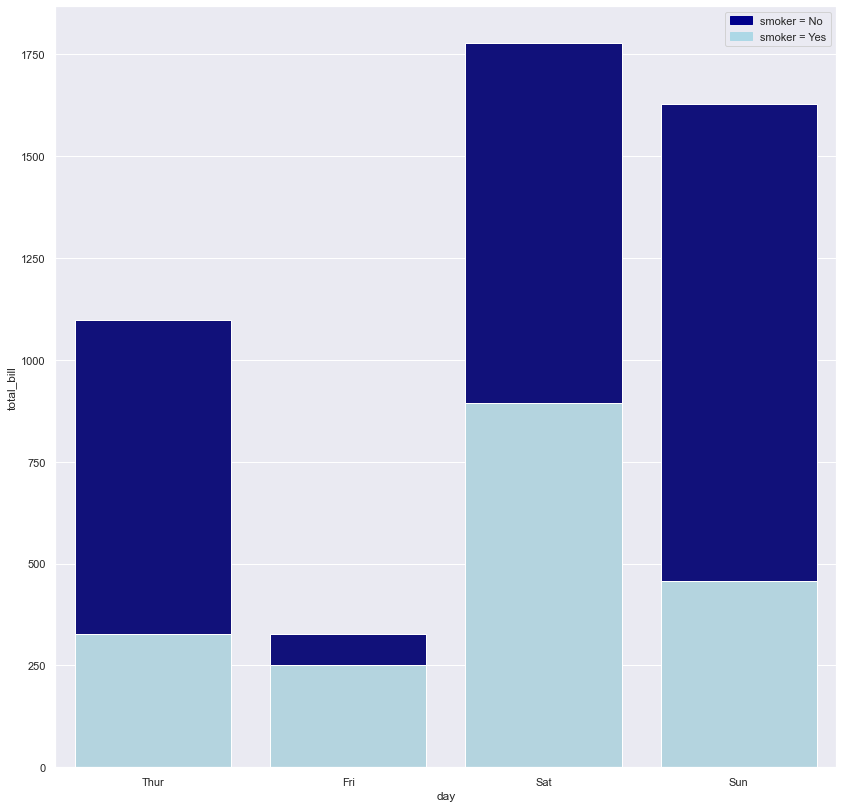

In [292]:
#code from python graphs gallerty to make seabourn stacked bar

tips = sns.load_dataset("tips")
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 14))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = tips.groupby('day')['total_bill'].sum().reset_index()
print(total)
# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
smoker = tips[tips.smoker=='Yes']
print(smoker)
# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()